<a href="https://colab.research.google.com/github/rajat10-01/machine-learning/blob/master/China's_GDP_VS_Year_Sigmoid_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# download dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2020-02-26 05:26:25 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [6]:
# check dataset format
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


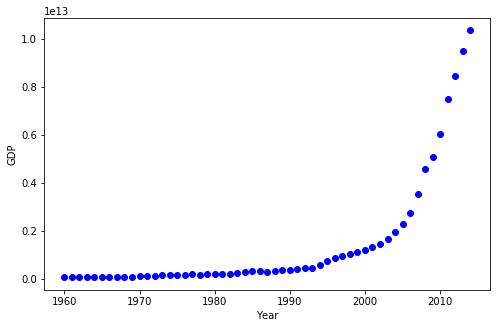

In [57]:
# plot the data to estimate function
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'bo')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

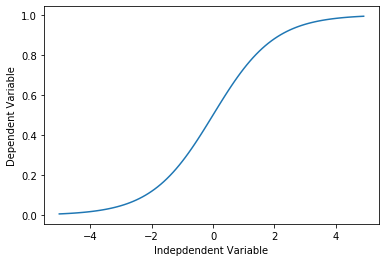

In [56]:
# from the graph we see it is exponential with year
# we choose sigmoidal model
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [0]:
# building the model
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [0]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [60]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


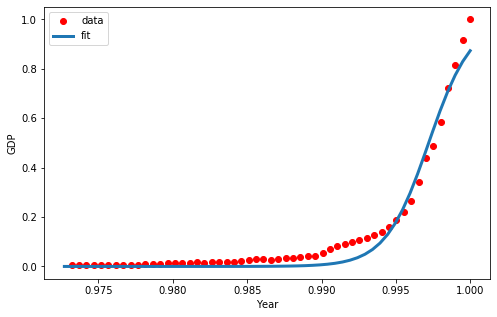

In [61]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [0]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x, train_y = (xdata[msk], ydata[msk])
test_x, test_y = (xdata[~msk], ydata[~msk])

In [0]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [0]:
# predict using test set
y_hat = sigmoid(test_x, *popt)

In [68]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.93


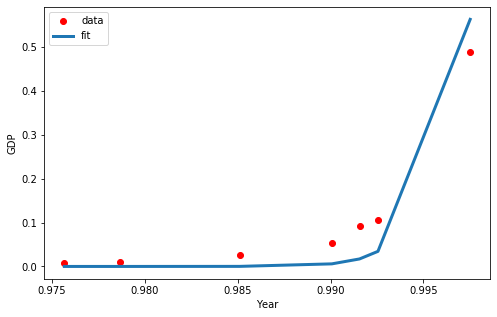

In [69]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
plt.plot(test_x, test_y, 'ro', label='data')
plt.plot(test_x,y_hat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()